IMPORT LIBRARIES AND LOAD THE DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:

df = pd.read_csv(r"C:\Users\AASHIK\Downloads\Projects\feynn\McDonalds\mcdonalds.csv")

DATA EXPLORATION AND PREPOCESSING 

In [5]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [6]:
# View basic info
print(df.shape)
print(df.columns)

(1453, 15)
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [7]:
missing_val = df.isnull().sum()
missing_val

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Importance of components:

PC   Std Dev   Var Explained     Cumulative
PC1   0.7570     0.2994             0.2994    
PC2   0.6075     0.1928             0.4922    
PC3   0.5046     0.1330             0.6253    
PC4   0.3988     0.0831             0.7084    
PC5   0.3374     0.0595             0.7679    
PC6   0.3103     0.0503             0.8182    
PC7   0.2897     0.0438             0.8620    
PC8   0.2751     0.0395             0.9016    
PC9   0.2653     0.0368             0.9383    
PC10  0.2488     0.0324             0.9707    
PC11  0.2369     0.0293             1.0000    

PCA Loadings (first few PCs):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036
fast        0.108  0.

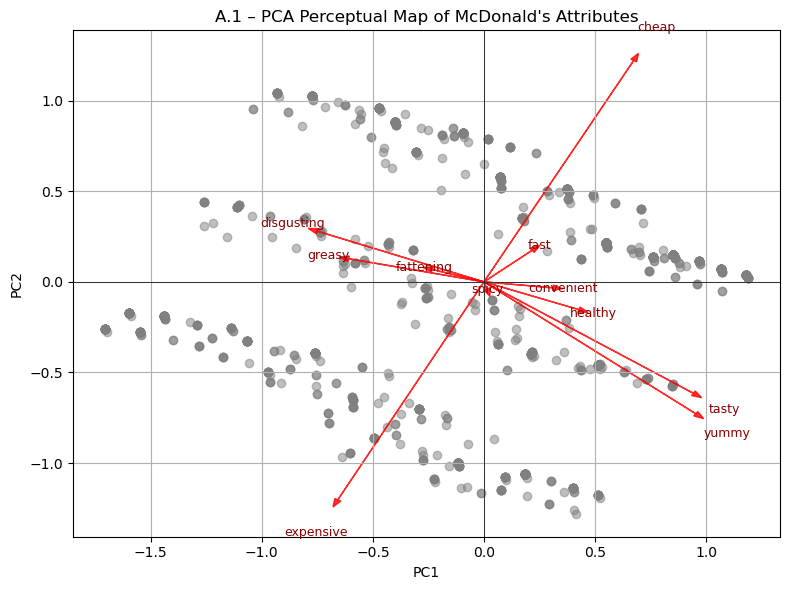

In [8]:
# Step 1: Convert Yes/No to binary 1/0 for the first 11 segmentation variables
MD_x = df.iloc[:, :11].apply(lambda col: col.map(lambda x: 1 if x == "Yes" else 0))

# Step 2: Perform PCA without standardization (as variables are already binary)
pca = PCA()
pca_coords = pca.fit_transform(MD_x)

# Step 3: Get PCA summary (standard deviations, variance explained, cumulative)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_devs = np.sqrt(pca.explained_variance_)

# Print PCA summary (like R's summary(MD.pca))
print("Importance of components:\n")
print(f"{'PC':<5}{'Std Dev':<10}{'Var Explained':<18}{'Cumulative':<10}")
for i in range(len(std_devs)):
    print(f"PC{i+1:<3} {std_devs[i]:<10.4f} {explained_variance[i]:<18.4f} {cumulative_variance[i]:<10.4f}")

# Step 4: Print loadings (PCA components, like R's print(MD.pca))
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=MD_x.columns
)
print("\nPCA Loadings (first few PCs):")
print(loadings.iloc[:, :7].round(3))  # Display first 7 PCs

# Step 5: Perceptual Map (Figure A.1) – Plot consumers and attribute arrows
fig, ax = plt.subplots(figsize=(8, 6))

# Plot projected respondents in PC1-PC2 space (grey dots)
ax.scatter(pca_coords[:, 0], pca_coords[:, 1], alpha=0.5, color='grey', label='Respondents')

# Plot arrows for each variable (attribute)
for i, var in enumerate(MD_x.columns):
    ax.arrow(0, 0, pca.components_[0, i]*2, pca.components_[1, i]*2,
             color='red', alpha=0.8, head_width=0.03)
    ax.text(pca.components_[0, i]*2.3, pca.components_[1, i]*2.3,
            var, color='darkred', ha='center', va='center', fontsize=9)

# Formatting the plot
ax.set_title('A.1 – PCA Perceptual Map of McDonald\'s Attributes')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)
ax.grid(True)
plt.tight_layout()

Extracting Segments using K-Means

In [10]:
k_values = range(2, 9)
wcss = []  # Within-cluster sum of squares (inertia)
labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)
    labels_dict[k] = kmeans.labels_

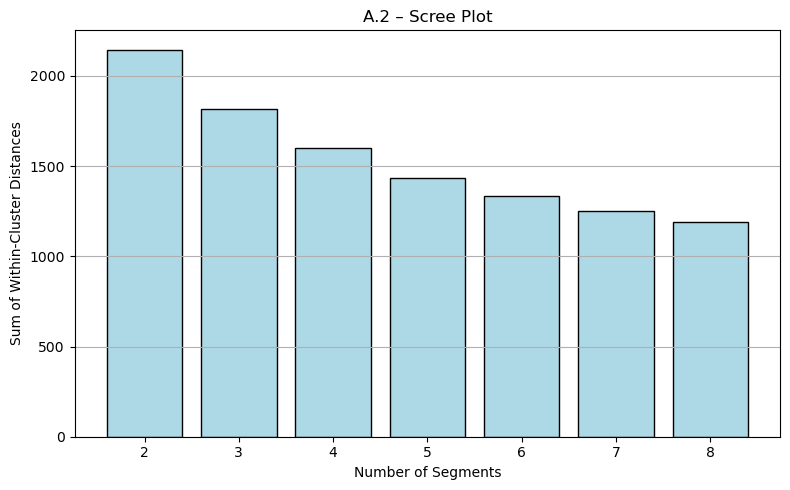

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(k_values, wcss, color='lightblue', edgecolor='black')
plt.title("A.2 – Scree Plot")
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.grid(axis='y')
plt.tight_layout()

Global Stability Analysis using Bootstrapped Adjusted Rand Index (ARI)

In [13]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# For each k, store 100 bootstrapped ARI values
boot_ari_scores = {k: [] for k in k_values}

# Outer loop over cluster sizes
for k in k_values:
    original_model = KMeans(n_clusters=k, n_init=10, random_state=42).fit(MD_x)
    original_labels = original_model.labels_

    # Perform 100 bootstrap samples
    for i in range(100):
        bootstrap_sample = resample(MD_x, replace=True, random_state=1000+i)
        bootstrap_model = KMeans(n_clusters=k, n_init=10, random_state=1000+i).fit(bootstrap_sample)

        # Predict labels on the original data using the bootstrap model
        boot_labels = bootstrap_model.predict(MD_x)

        # Compute ARI between original clustering and bootstrap prediction
        ari = adjusted_rand_score(original_labels, boot_labels)
        boot_ari_scores[k].append(ari)

C:\Users\AASHIK\AppData\Local\Temp\ipykernel_4288\730979537.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([boot_ari_scores[k] for k in k_values], labels=k_values)


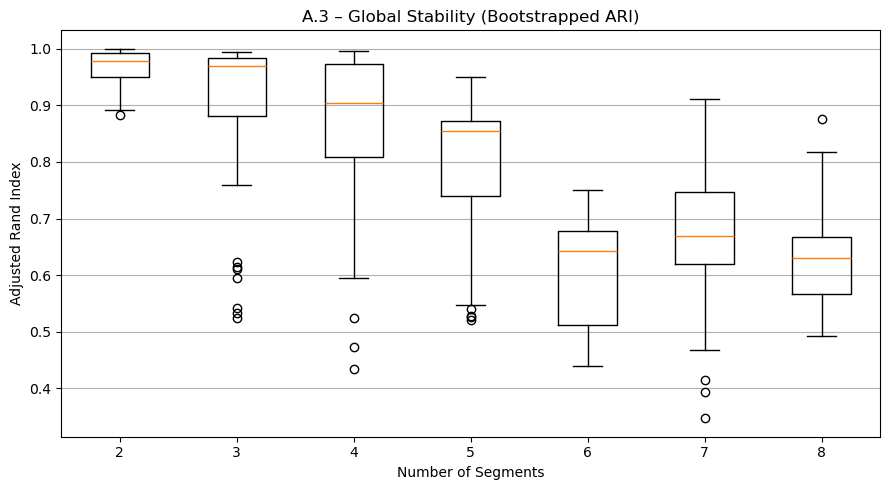

In [14]:
plt.figure(figsize=(9, 5))
plt.boxplot([boot_ari_scores[k] for k in k_values], labels=k_values)
plt.title("A.3 – Global Stability (Bootstrapped ARI)")
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.grid(axis='y')
plt.tight_layout()

Gorge Plot: Segment Centers for k = 4 Clusters

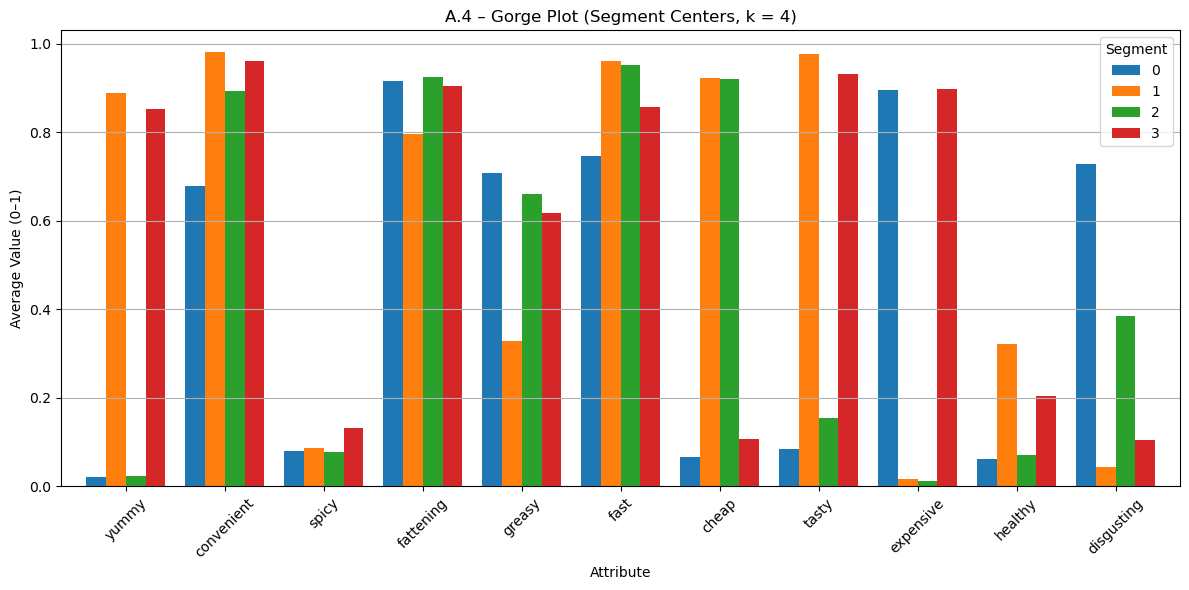

In [16]:
# Re-run k-means with 4 clusters
kmeans_k4 = KMeans(n_clusters=4, n_init=10, random_state=42).fit(MD_x)
df['cluster_k4'] = kmeans_k4.labels_

# Compute mean (i.e., segment center) for each attribute by cluster
cluster_means = MD_x.copy()
cluster_means['cluster'] = df['cluster_k4']
means = cluster_means.groupby('cluster').mean().T  # Transpose for attributes on x-axis

# Bar chart like gorge plot
means.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("A.4 – Gorge Plot (Segment Centers, k = 4)")
plt.xlabel("Attribute")
plt.ylabel("Average Value (0–1)")
plt.xticks(rotation=45)
plt.legend(title="Segment")
plt.grid(axis='y')
plt.tight_layout()

Segment-Level Stability Across Solutions (SLSA)

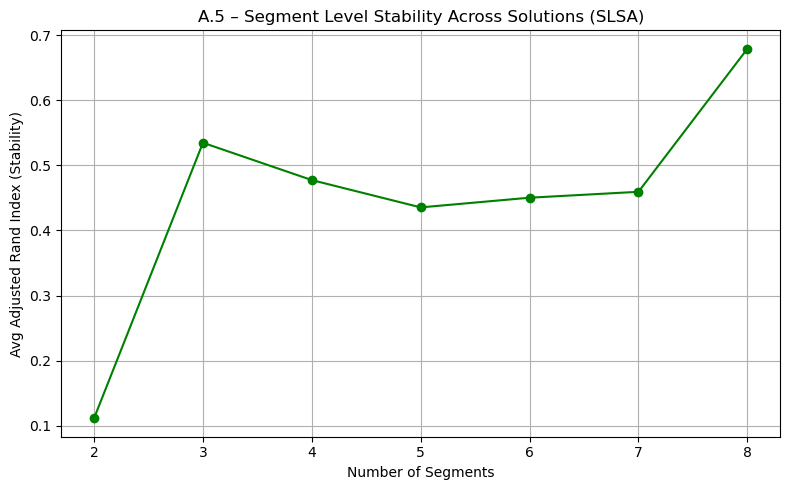

In [18]:
slsa_scores = []
k_values = range(2, 9)

for k in k_values:
    labels = []
    for seed in range(5):  # 5 random seeds for replication
        km = KMeans(n_clusters=k, n_init=1, random_state=seed).fit(MD_x)
        labels.append(km.labels_)

    # Use the first run as reference, compute average ARI vs others
    ref = labels[0]
    mean_ari = np.mean([adjusted_rand_score(ref, lab) for lab in labels[1:]])
    slsa_scores.append(mean_ari)

# Plot SLSA
plt.figure(figsize=(8, 5))
plt.plot(k_values, slsa_scores, marker='o', color='green')
plt.title("A.5 – Segment Level Stability Across Solutions (SLSA)")
plt.xlabel("Number of Segments")
plt.ylabel("Avg Adjusted Rand Index (Stability)")
plt.grid(True)
plt.tight_layout()

Segment-Level Stability Within Solutions (SLSW, k = 4)

C:\Users\AASHIK\AppData\Local\Temp\ipykernel_4288\1484080068.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([segment_stability[i] for i in range(4)], labels=[1, 2, 3, 4])


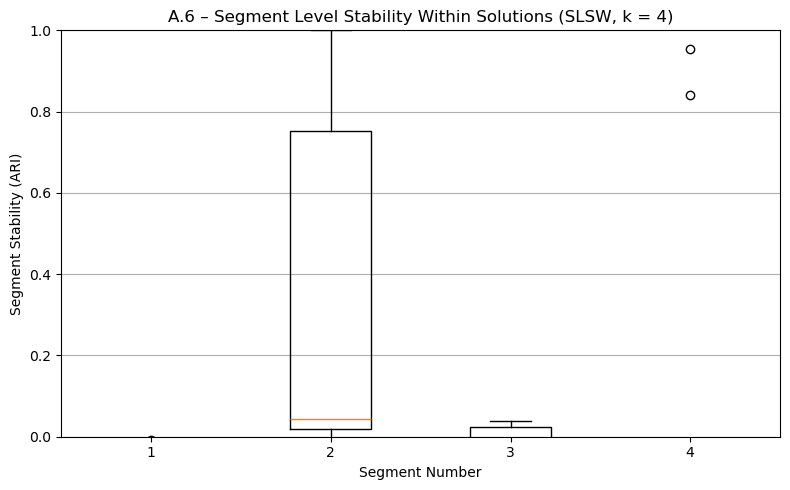

In [20]:
from sklearn.utils import resample

segment_stability = {i: [] for i in range(4)}  # 4 segments

# Reference model on full data
ref_model = KMeans(n_clusters=4, n_init=10, random_state=42).fit(MD_x)
ref_labels = ref_model.labels_

# Bootstrap and compare labels
for i in range(10):  # Try 10 bootstrap samples
    boot = resample(MD_x, replace=True, random_state=100 + i)
    boot_model = KMeans(n_clusters=4, n_init=10, random_state=100 + i).fit(boot)
    predicted = boot_model.predict(MD_x)

    for s in range(4):
        ref_binary = (ref_labels == s).astype(int)
        pred_binary = (predicted == s).astype(int)
        ari = adjusted_rand_score(ref_binary, pred_binary)
        segment_stability[s].append(ari)

# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([segment_stability[i] for i in range(4)], labels=[1, 2, 3, 4])
plt.ylim(0, 1)
plt.title("A.6 – Segment Level Stability Within Solutions (SLSW, k = 4)")
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability (ARI)")
plt.grid(axis='y')
plt.tight_layout()

Model Selection using Information Criteria (AIC, BIC, ICL) for Gaussian Mixture Models

In [22]:
from sklearn.mixture import GaussianMixture

aic_scores = []
bic_scores = []
icl_scores = []
gmm_models = {}

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, covariance_type='diag', n_init=10, random_state=42)
    gmm.fit(MD_x)

    # Store models and scores
    gmm_models[k] = gmm
    aic_scores.append(gmm.aic(MD_x))
    bic_scores.append(gmm.bic(MD_x))

    # ICL ≈ BIC - entropy (we approximate entropy from posterior probs)
    probs = gmm.predict_proba(MD_x)
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # Add small value to avoid log(0)
    icl_scores.append(bic_scores[-1] + entropy)

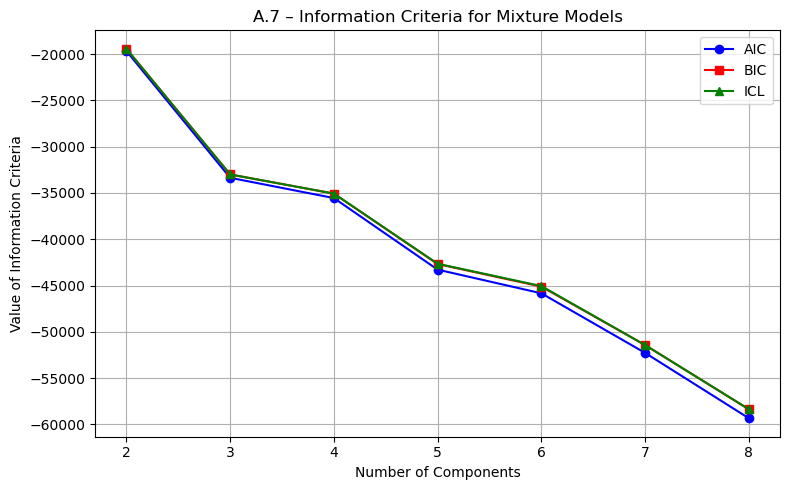

In [23]:
k_range = range(2, 9)

plt.figure(figsize=(8, 5))
plt.plot(k_range, aic_scores, marker='o', label='AIC', color='blue')
plt.plot(k_range, bic_scores, marker='s', label='BIC', color='red')
plt.plot(k_range, icl_scores, marker='^', label='ICL', color='green')

plt.title("A.7 – Information Criteria for Mixture Models")
plt.xlabel("Number of Components")
plt.ylabel("Value of Information Criteria")
plt.legend()
plt.grid(True)
plt.tight_layout()

Comparing K-Means and Gaussian Mixture Models (GMM) for k = 4

In [25]:
# Step 1: Fit k-means with 4 clusters
kmeans_k4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_k4.fit(MD_x)
df['kmeans_seg'] = kmeans_k4.labels_

# Step 2: Fit GMM with 4 components (random init, 10 restarts)
gmm_k4 = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=42)
gmm_k4.fit(MD_x)
df['mixture_seg'] = gmm_k4.predict(MD_x)

# Step 3: Show cross-tabulation between k-means and mixture segments
print("Contingency Table: K-means vs Mixture (Random Init)")
cross_tab = pd.crosstab(df['kmeans_seg'], df['mixture_seg'],
                        rownames=['kmeans'], colnames=['mixture'])
print(cross_tab)

# Step 4: Fit another GMM (re-initialized by random again, to simulate re-fit)
gmm_k4_reinit = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=123)
gmm_k4_reinit.fit(MD_x)
df['mixture_reinit'] = gmm_k4_reinit.predict(MD_x)

# Step 5: Cross-tab again to compare second GMM vs k-means
print("\nContingency Table: K-means vs Mixture (Second Init)")
cross_tab2 = pd.crosstab(df['kmeans_seg'], df['mixture_reinit'],
                         rownames=['kmeans'], colnames=['mixture (new)'])
print(cross_tab2)

# Step 6: Log-likelihood comparison (as in R)
loglik_original = gmm_k4.lower_bound_ * len(MD_x)
loglik_reinit = gmm_k4_reinit.lower_bound_ * len(MD_x)

print("\nLog-Likelihoods:")
print(f"Mixture (Random Init):     {loglik_original:.2f}")
print(f"Mixture (Second Init):     {loglik_reinit:.2f}")


Contingency Table: K-means vs Mixture (Random Init)
mixture    0   1    2    3
kmeans                    
0         19   7    0  214
1         48  18  514    0
2         19   2  171  117
3        254  44   26    0

Contingency Table: K-means vs Mixture (Second Init)
mixture (new)   0    1    2    3
kmeans                          
0              36  204    0    0
1              27    0  504   49
2              47  234   28    0
3              40   32   22  230

Log-Likelihoods:
Mixture (Random Init):     17869.10
Mixture (Second Init):     22705.19


Regression Summary per Segment

In [27]:
# Define the mapping from string levels to numeric
like_map = {
    "I love it!+5": 5, "+4": 4, "+3": 3, "+2": 2, "+1": 1,
    "0": 0, "-1": -1, "-2": -2, "-3": -3, "-4": -4, "I hate it!-5": -5
}

df['Like.n'] = df['Like'].map(like_map)

In [28]:
X = MD_x  # already converted Yes/No to 1/0
y = df['Like.n']

C:\Users\AASHIK\AppData\Local\Temp\ipykernel_4288\580194430.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


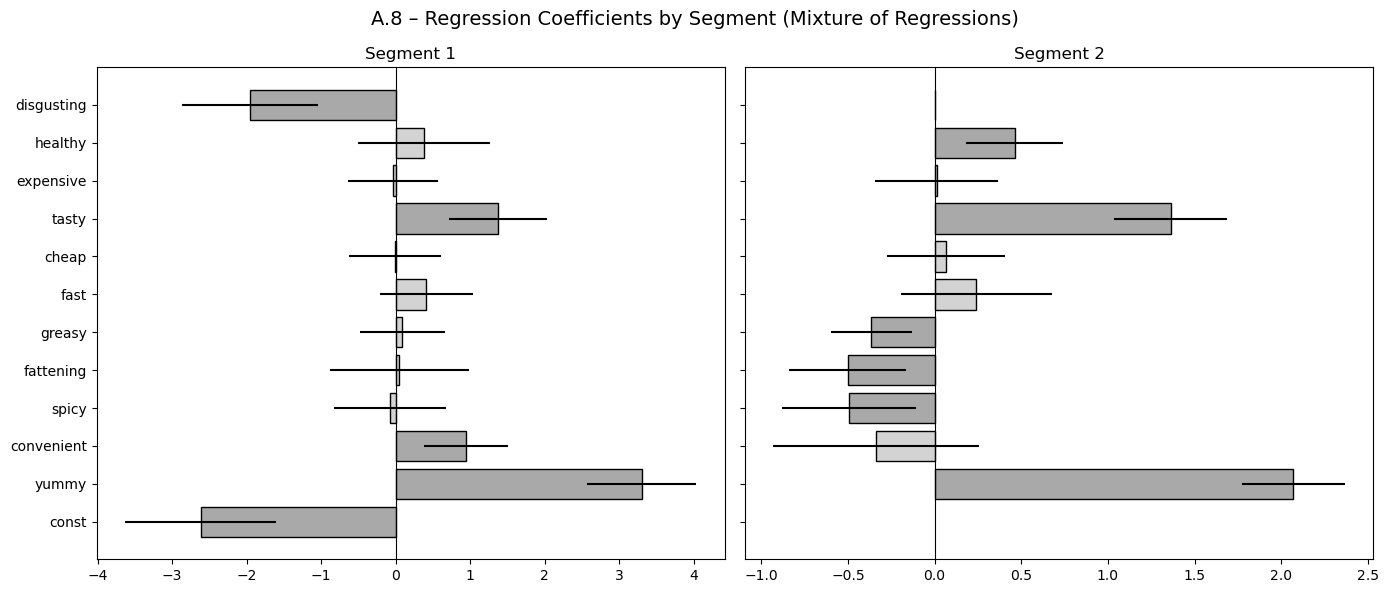

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm

# Step 1: Prepare data
X = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)
y = df['Like.n']
data_combined = np.column_stack((y, X))

# Step 2: Run GMM on [y|X]
gmm_reg = GaussianMixture(n_components=2, n_init=10, covariance_type='full', random_state=42)
gmm_reg.fit(data_combined)
df['reg_mix_seg'] = gmm_reg.predict(data_combined)

# Step 3: Fit OLS regressions per segment
coefs, conf_ints, p_values = [], [], []

for seg in sorted(df['reg_mix_seg'].unique()):
    X_seg = X[df['reg_mix_seg'] == seg]
    y_seg = y[df['reg_mix_seg'] == seg]
    X_seg_const = sm.add_constant(X_seg)

    model = sm.OLS(y_seg, X_seg_const).fit()

    coefs.append(model.params)
    conf_ints.append(model.conf_int())
    p_values.append(model.pvalues)

# Step 4: Get common aligned index including 'const'
attributes = coefs[0].index.tolist()
segments = ['Segment 1', 'Segment 2']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i in range(2):
    # Align everything using index
    coefs_i = coefs[i].reindex(attributes)
    ci_i = conf_ints[i].reindex(attributes)
    pvals_i = p_values[i].reindex(attributes)

    # CI error bars
    lower_err = coefs_i - ci_i[0]
    upper_err = ci_i[1] - coefs_i
    xerr = np.vstack([lower_err, upper_err])

    # Significance color
    colors = ['darkgrey' if p < 0.05 else 'lightgrey' for p in pvals_i]

    # Plot
    axes[i].barh(attributes, coefs_i, xerr=xerr, color=colors, edgecolor='black')
    axes[i].set_title(segments[i])
    axes[i].axvline(0, color='black', lw=0.8)
    axes[i].invert_yaxis()

fig.suptitle("A.8 – Regression Coefficients by Segment (Mixture of Regressions)", fontsize=14)
plt.tight_layout()
plt.show()

Segment Profile Plot (Ordered by Attribute Clustering)

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import numpy as np

# Transpose MD_x so that clustering is done on attributes
attr_dist = pdist(MD_x.T, metric='euclidean')
linkage_matrix = linkage(attr_dist, method='ward')

# Get order of attributes from dendrogram
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_attributes = [MD_x.columns[i] for i in dendro['leaves']]

In [32]:
import pandas as pd

segment_profiles = MD_x.copy()
segment_profiles['segment'] = df['kmeans_seg']

# Calculate mean (i.e., % Yes) by segment
means_by_segment = segment_profiles.groupby('segment').mean().T  # shape: attributes x segments

# Calculate overall means
overall_means = MD_x.mean()

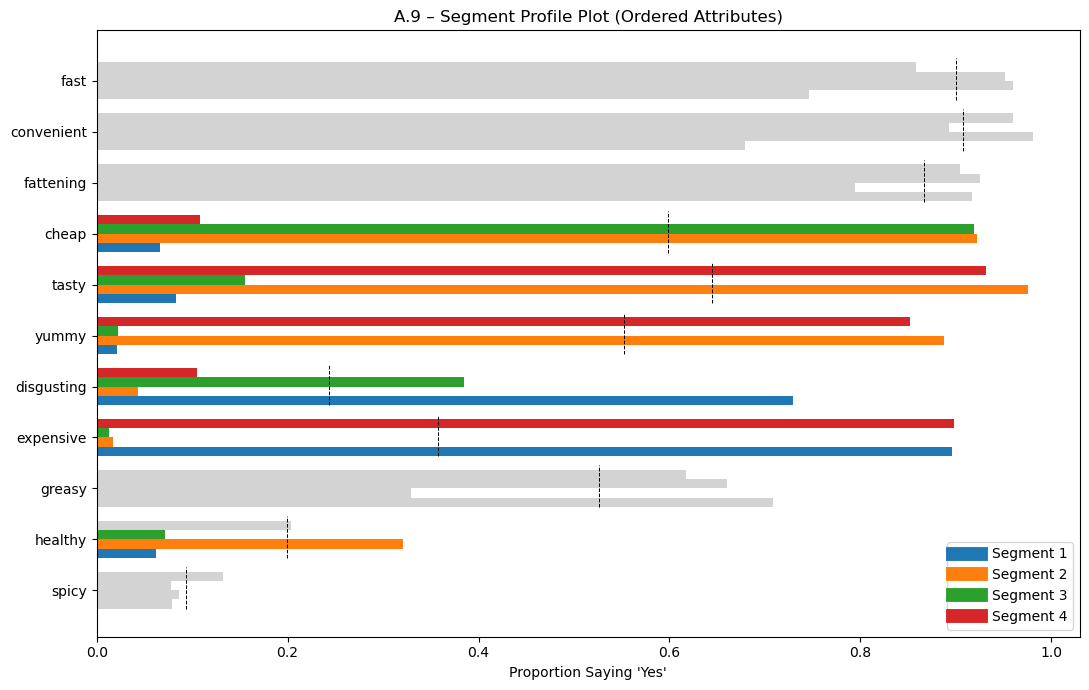

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# --- Marker Condition Function ---
def is_marker(attr, seg_val, overall_val):
    abs_diff = abs(seg_val - overall_val)
    rel_diff = abs_diff / (overall_val + 1e-10)
    return abs_diff > 0.25 or rel_diff > 0.5

# --- Setup ---
plt.figure(figsize=(11, 7))
bar_height = 0.18
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # fixed color map
segments = range(4)

# --- Draw bars manually for full control ---
for seg in segments:
    values = means_by_segment.loc[ordered_attributes, seg]
    y_base = np.arange(len(ordered_attributes)) + seg * bar_height

    for i, attr in enumerate(ordered_attributes):
        seg_val = values[attr]
        overall_val = overall_means[attr]
        color = colors[seg] if is_marker(attr, seg_val, overall_val) else 'lightgrey'

        plt.barh(
            y=y_base[i],
            width=seg_val,
            height=bar_height,
            color=color,
            edgecolor="none"
        )

# --- Plot overall population reference lines ---
for i, attr in enumerate(ordered_attributes):
    plt.plot(
        [overall_means[attr]]*2,
        [i - 0.1, i + bar_height * len(segments)],
        color='black', linestyle='--', linewidth=0.7
    )

# --- Final plot settings ---
plt.yticks(np.arange(len(ordered_attributes)) + bar_height * 1.5, ordered_attributes)
plt.xlabel("Proportion Saying 'Yes'")
plt.title("A.9 – Segment Profile Plot (Ordered Attributes)")
legend_patches = [plt.Line2D([0], [0], color=c, lw=10, label=f'Segment {i+1}') for i, c in enumerate(colors)]
plt.legend(handles=legend_patches, loc='lower right')
plt.tight_layout()
plt.show()

Segment Separation Plot with PCA + Attribute Arrows

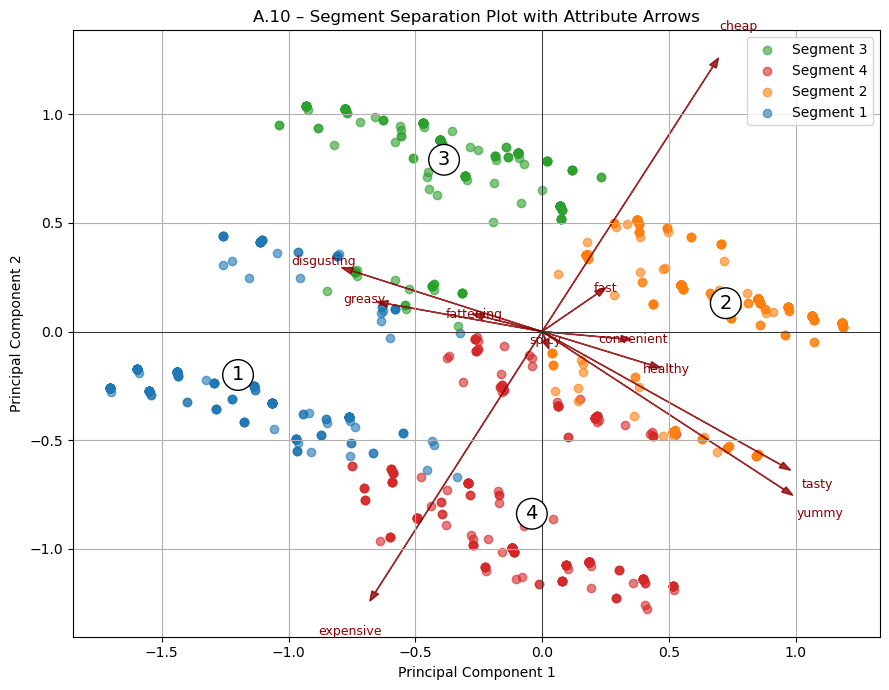

In [35]:
import matplotlib.pyplot as plt

# Step 1: Projected PCA coords already stored in `pca_coords`
df['PC1'] = pca_coords[:, 0]
df['PC2'] = pca_coords[:, 1]

# Segment labels assumed to be in: df['kmeans_seg'] (0-based)
segment_labels = df['kmeans_seg'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # One color per segment

# Step 2: Create combined plot
fig, ax = plt.subplots(figsize=(9, 7))

# Plot data points colored by segment
for seg in segment_labels:
    segment_data = df[df['kmeans_seg'] == seg]
    ax.scatter(segment_data['PC1'], segment_data['PC2'],
               alpha=0.6, label=f"Segment {seg+1}", color=colors[seg])

    # Plot segment centers
    center_x = segment_data['PC1'].mean()
    center_y = segment_data['PC2'].mean()
    ax.text(center_x, center_y, str(seg+1), fontsize=14,
            ha='center', va='center', color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))

# Step 3: Add PCA attribute arrows
for i, var in enumerate(MD_x.columns):
    ax.arrow(0, 0,
             pca.components_[0, i]*2, pca.components_[1, i]*2,
             color='darkred', alpha=0.8, head_width=0.03)
    ax.text(pca.components_[0, i]*2.3, pca.components_[1, i]*2.3,
            var, color='darkred', ha='center', va='center', fontsize=9)

# Plot formatting
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("A.10 – Segment Separation Plot with Attribute Arrows")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

Mosaic Plot: Segment vs Liking McDonald’s

<Figure size 1200x1000 with 0 Axes>

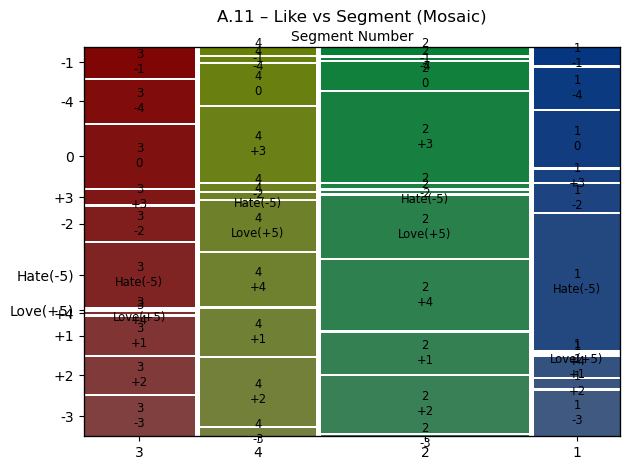

In [37]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

df['segment'] = df['kmeans_seg'] + 1

# Convert Like.n to label
like_labels = {
    -5: "Hate(-5)", -4: "-4", -3: "-3", -2: "-2", -1: "-1",
     0: "0", 1: "+1", 2: "+2", 3: "+3", 4: "+4", 5: "Love(+5)"
}
df['Like.cat'] = df['Like.n'].map(like_labels)

# Create mosaic plot
plt.figure(figsize=(12, 10))
mosaic(df, ['segment', 'Like.cat'], title='A.11 – Like vs Segment (Mosaic)', gap=0.01)
plt.xlabel("Segment Number")
plt.tight_layout()
plt.show()

Mosaic Plot: Segment vs Gender

<Figure size 800x500 with 0 Axes>

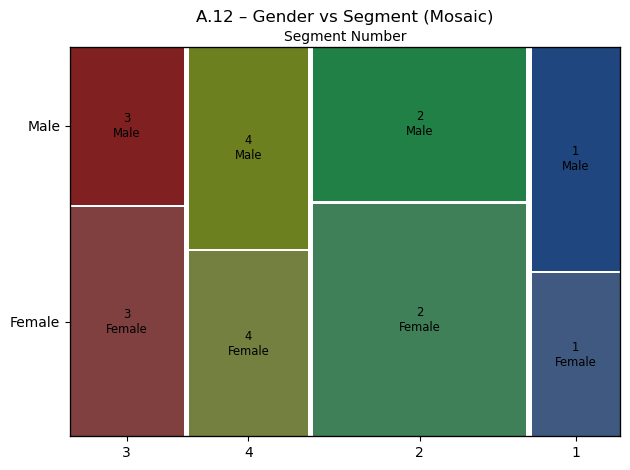

In [39]:
df['segment'] = df['kmeans_seg'] + 1

plt.figure(figsize=(8, 5))
mosaic(df, ['segment', 'Gender'], title='A.12 – Gender vs Segment (Mosaic)', gap=0.01)
plt.xlabel("Segment Number")
plt.tight_layout()
plt.show()

Parallel Boxplot: Age Distribution by Segment

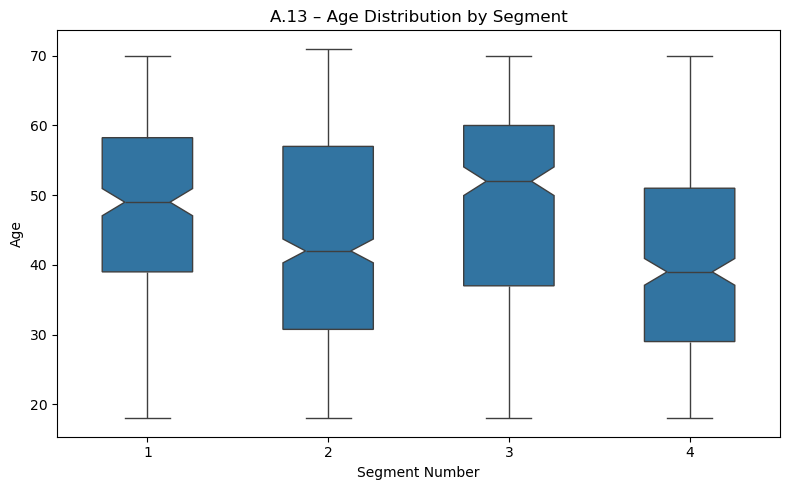

In [41]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x="segment", y="Age", data=df, notch=True, width=0.5)
plt.title("A.13 – Age Distribution by Segment")
plt.xlabel("Segment Number")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

 Decision Tree: Predicting Segment 3 Membership

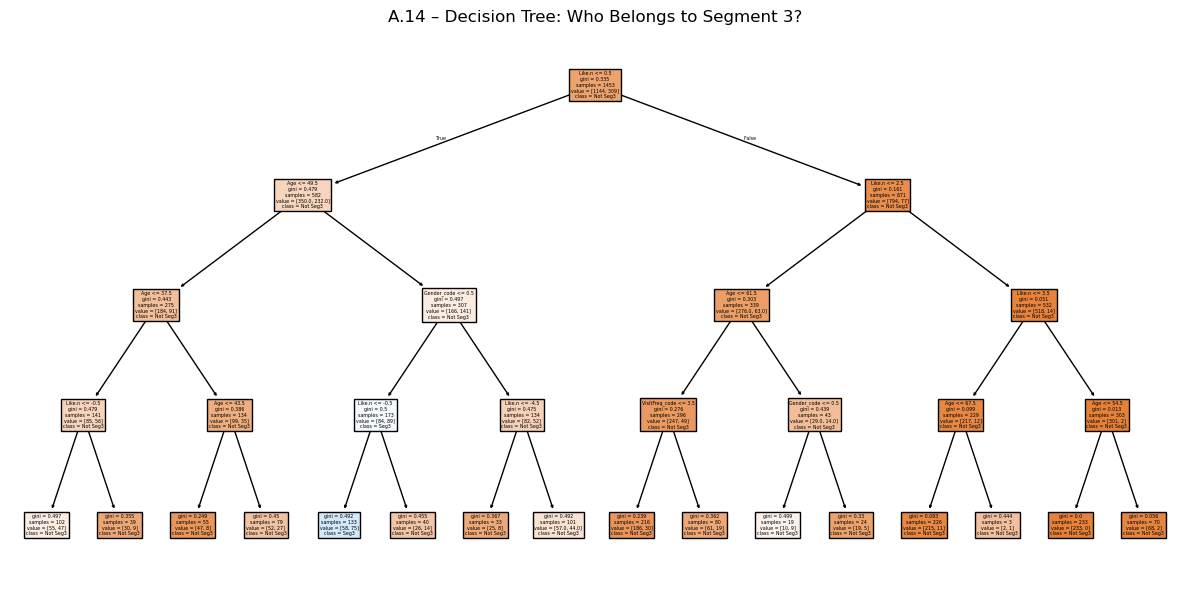

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Target: is this person in segment 3?
df['is_seg3'] = (df['kmeans_seg'] == 2).astype(int)

# Encode VisitFrequency as categorical codes
df['VisitFreq_code'] = df['VisitFrequency'].astype('category').cat.codes
df['Gender_code'] = df['Gender'].astype('category').cat.codes

# Features
X = df[['Like.n', 'Age', 'VisitFreq_code', 'Gender_code']]
y = df['is_seg3']

# Train tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Plot
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Seg3", "Seg3"], filled=True)
plt.title("A.14 – Decision Tree: Who Belongs to Segment 3?")
plt.tight_layout()
plt.show()

Segment Evaluation Plot

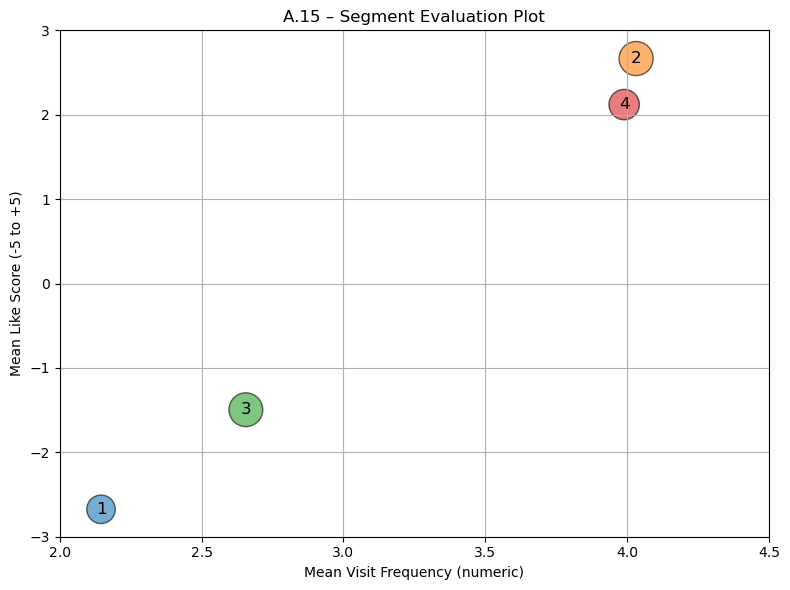

In [45]:
# Map VisitFrequency to ordinal scale

visit_map = {
    "Never": 1,
    "Less than once a month": 2,
    "Once a month": 3,
    "Every three weeks": 4,
    "Every two weeks": 5,
    "Once a week": 6,
    "Several times a week": 7
}

df['VisitFreq_num'] = df['VisitFrequency'].map(visit_map)

# Group by segment (1–4)
seg_group = df.groupby('segment')

# Mean visit frequency
visit_means = seg_group['VisitFreq_num'].mean()

# Mean Like.n
like_means = seg_group['Like.n'].mean()

# % Female
female_props = seg_group['Gender'].apply(lambda x: (x == "Female").mean())

import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means, like_means,
    s=female_props * 1000,  # Scale bubble size
    alpha=0.6,
    edgecolors='black',
    c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
)

# Annotate segment numbers
for i in range(1, 5):
    plt.text(visit_means[i], like_means[i], str(i), fontsize=12, ha='center', va='center')

# Axis labels and limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel("Mean Visit Frequency (numeric)")
plt.ylabel("Mean Like Score (-5 to +5)")
plt.title("A.15 – Segment Evaluation Plot")
plt.grid(True)
plt.tight_layout()
plt.show()